### Problem Statement
Extract and recognize the text (including handwritten text) from the sample cheque image.

##### Importing the relevent libraries

In [1]:
import os, io
from google.cloud import vision_v1
from google.cloud.vision_v1 import types
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,30)

##### Provide authentication credentials by setting the environment variable GOOGLE_APPLICATION_CREDENTIALS and create a client instance.

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'C:\Users\aslam\Documents\Python venv\ServiceAccountToken.json'
client = vision_v1.ImageAnnotatorClient()

In [3]:
folder_path = r'E:\Code\Projects\Handwritten text recognition using CNN'
file = 'Sample_Cheque_1.jpg'
file_path = os.path.join(folder_path, file)

##### Open the file as name image_file and store the binary information in content object. 'rb' is for read binary.

In [4]:
with io.open(file_path, 'rb') as image_file:
    content = image_file.read()

In [5]:
image = vision_v1.types.Image(content = content)
response = client.document_text_detection(image = image)
text = response.text_annotations

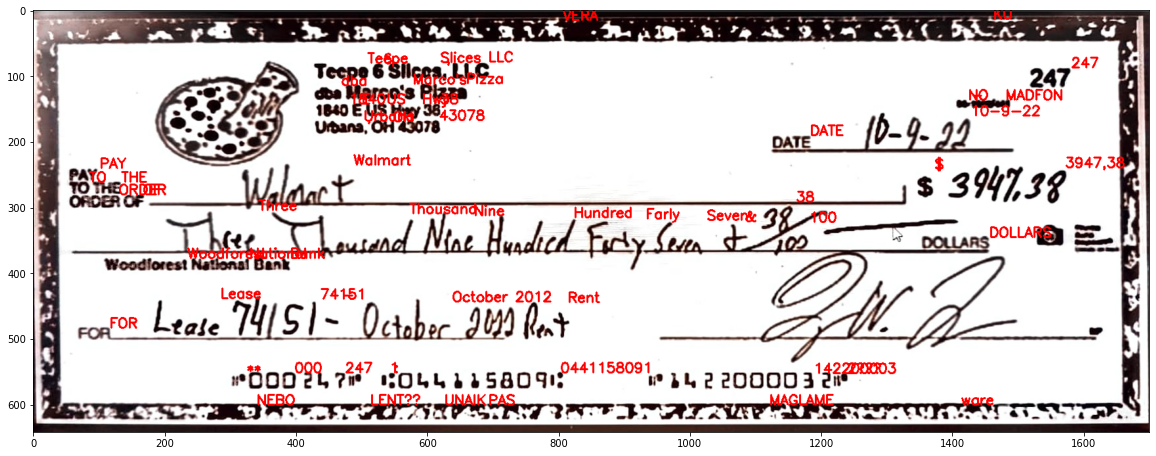

In [7]:
img = cv2.imread("E:\Code\Projects\Handwritten text recognition using CNN\Sample_cheque_1.jpg")
for i in range(1,len(text)):
    img = cv2.putText(img, text[i].description, ((text[i].bounding_poly.vertices[1].x),(text[i].bounding_poly.vertices[1].y)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
plt.rcParams["figure.figsize"] = (20,30)
plt.imshow(img)

In [117]:
docText = response.full_text_annotation.text
for i in docText:
    print(i, end='')

PAY
TO THE
ORDER OF
VERA
FOR
Teepe 6 Slices, LLC
dba Marco's Pizza
1840 E US Hwy 38
Urbana, OH 43078
Walmart
Three Thousand Nine Hundred Farly Seven & 100
Woodforest National Bank
38
Lease 74151 - October 2012 Rent
DATE
**000 247 1:0441158091
NEBO LENTÉ UNAIK PAS MAGLAME
142200003 2⁰
KU
NO-MADFON
10-9-22
$3947,38
DOLLARS
247
ware